In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import worm_env_draft as wed
from improc import *
import utils as ut

In [2]:
worm = wed.ProcessedWorm(90,ep_len=300)
cam,task = init_instruments()

obs = worm.reset(cam,task)

done = False
obss,rews,infos = [],[],[]

while not done:
    action = np.random.choice([0,1])
    obs,rew,done,info = worm.step(action,cam,task)
    obss.append(obs)
    rews.append(rew)
    infos.append(info)
    
task.write(0)
cam.exit()
task.close()

Done resetting	


In [3]:
obss = np.array(obss).flatten().reshape(-1,2)*180

In [5]:
locs = []
# olds = []
# dirs = []
for info in infos:
    locs.append(info['loc'])
#     olds.append(info['oldobs'])
#     dirs.append(info['direction'])
locs = np.array(locs).flatten().reshape(-1,2)
# olds = np.array(olds).flatten()
# dirs = np.array(dirs).flatten()

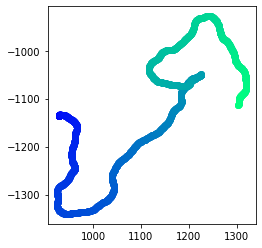

In [6]:
NPOINTS = len(locs)
start = 0
fig,ax = plt.subplots(1)

ax.set_prop_cycle('color',plt.cm.winter(np.linspace(0,1,NPOINTS)))
for i in np.arange(start,start+NPOINTS-1):
    img = ax.scatter(locs[i,0],-locs[i,1])
    ax.set_aspect('equal','box')

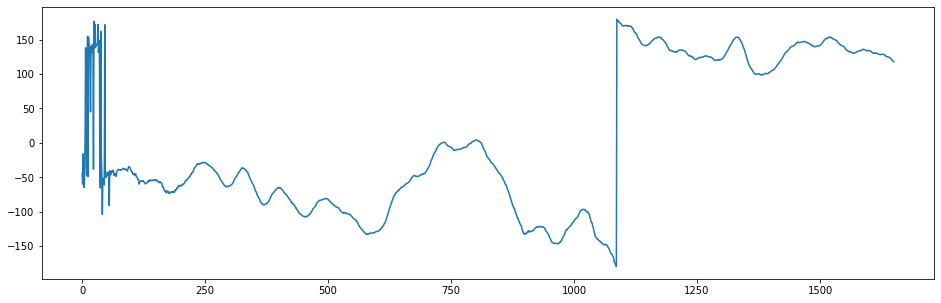

In [27]:
plt.figure(figsize=(16,5))
plt.plot(ut.wrap_correct(dirs-90))

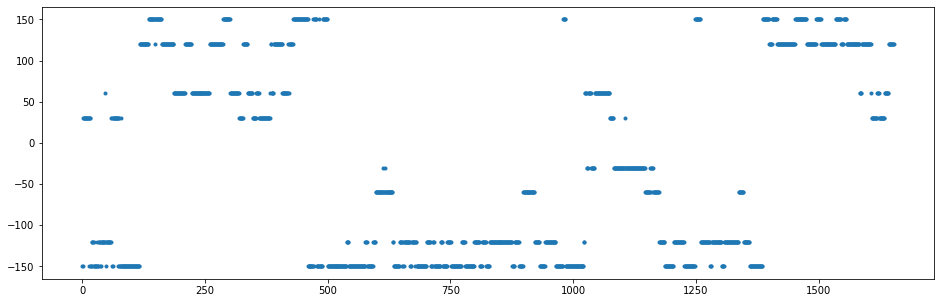

In [9]:
plt.figure(figsize=(16,5))
plt.plot(obss[:,0],'.')
#plt.plot(olds)

In [7]:
# Use location array to make direction of travel
window=20
angs = []
for i in np.arange(window//2,len(locs)-window//2):
    mvt = np.sum(locs[i-window//2:i+window//2,:]-locs[i-window//2,:],axis=0)
    angs.append(np.arctan2(-mvt[1],mvt[0])*180/pi - infos[i]['target'])   # flip y as usual 

angs = np.hstack([np.zeros(window//2)+angs[0],angs,np.zeros(window//2)+angs[-1]])

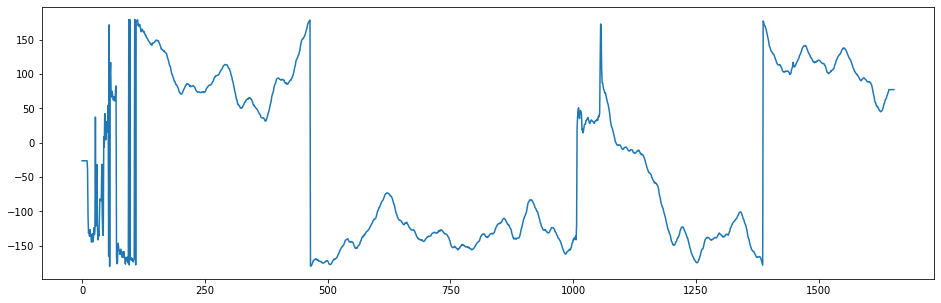

In [10]:
plt.figure(figsize=(16,5))
plt.plot(ut.wrap_correct(angs))